## Import relevant modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Population

The set that contains **all** elements of interest for a particular study.

### Sub-population

Smaller groups divided from a population by choosing any characteristic for the division. The division must obey the following rules:
1. Mutually exclusive: a member of one group cannot belong to another group
2. Collectively exhaustive: each member in the population belongs to a group

In [9]:
dtype = {'PassengerId': str, 'Survived': str, 'Pclass': str, 'Name': str, 'Sex': str, 'Ticket': str, 'Cabin': str, \
         'Embarked': str}
titanic = pd.read_csv('data/titanic.csv', dtype=dtype)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,263,0,3,"Collyer, Miss. Marjorie ""Lottie""",male,1601,G6,S
freq,1,549,491,1,577,7,4,644


Attributes that can (possibly) be used to form sub-populations:
1. Survived
2. Pclass
3. Sex
4. Embarked

## Samples

Select/draw a subset of the population to estimate the properties of the population. Denote the size of a sample by $n$ and the size of population by $N$, where $1 \leq n \leq N$.

Samples can be drawn it two ways
1. Drawing with replacement: a sampled draw is put back into the population before the second draw is made
2. Drawing without replacement: a sampled draw is not put back into the population before the second draw is made

Sampling of real world data is generally done *without replacement*. Sampling with replacement is used in *oversampling techniques* (commonly used in machine learning).

### Homogenous and Hetereogenous Samples

- Homogenous samples: all members are drawn from the same sub-population
- Heterogenous samples: all members are drawn from multiple sub-populations

To ensure samples accurately reflect the demographic proportions of the population, the drawed samples should have the same ratio of membeers across the various types to that of the population. A *representative sample* is a sample with the same ratio of members to that of the sub-population ratio. If not, a sample is *biased* (and in this case, numerical measures such as *mean* and *variance* of the biased sample do not accurately reflect that of the population).

In [15]:
np.random.seed(42)

sample1 = titanic.loc[titanic['Pclass'] == '3',].sample(n=200, replace=False)
sample1.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,200,200,200,200,200,200,2,200
unique,200,2,1,200,2,180,2,3
top,181,0,3,"Ilmakangas, Miss. Pieta Sofia",male,CA. 2343,F G73,S
freq,1,158,200,1,137,4,1,140


In [16]:
titanic.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,263,0,3,"Collyer, Miss. Marjorie ""Lottie""",male,1601,G6,S
freq,1,549,491,1,577,7,4,644


In [18]:
print("Proportion in sample1:")
sample1['Sex'].value_counts(normalize=True)

Proportion in sample1:


male      0.685
female    0.315
Name: Sex, dtype: float64

In [22]:
print("Proportion in population:")
titanic['Sex'].value_counts(normalize=True)

Proportion in population:


male      0.647587
female    0.352413
Name: Sex, dtype: float64

### Sampling Frames and Sampling Units

Sampling frame - a list of all the members in the population to sample from
Sampling unit - the selection size (number of members to select) at a single time when drawing samples

Example:

| Component      | Example                                               |
|:--------------:| :----------------------------------------------------:|
| Population     | Every customer that has visited the company's website |
| Sampling Frame | Those customers that have created an account          |
| Samples        | Customers who actually responded to the survey        |

## Probabilistic Sampling

Sampling technique in which the *likelihood* that a member of the population is selected as part of a sample is known (can be calculated).

### Simple Random Sampling

Each member of the population has an equal chance to be selected as part of the sample. This can be done by randomly selecting members from the population.

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    1. Samples can easily be drawn
    <p>
    2. Selection bias is minimal as the process of drawing is random
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    1. Requires a well-defined sampling frame
    <p>
    2. May not yield a representative sample as there is no stipulation on the ratio of members drawn
</div>

In [23]:
sr_sample = titanic.sample(n=300, replace=False)
sr_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,300,300,300,300,300,300,71,298
unique,300,2,3,300,2,262,62,3
top,683,0,3,"Johnson, Mr. Malkolm Joackim",male,347088,C23 C25 C27,S
freq,1,179,161,1,179,5,3,212


In [46]:
def compare_pop_sample(population, sample, feature):
    pop_prop = population[feature].value_counts(normalize=True)
    smp_prop = sample[feature].value_counts(normalize=True)
    pop_smp = pd.concat([pop_prop, smp_prop], axis=0, keys=["population", "sample"]).reset_index()
    sns.catplot(data=pop_smp, x='level_1', y=feature, hue='level_0', kind='bar')

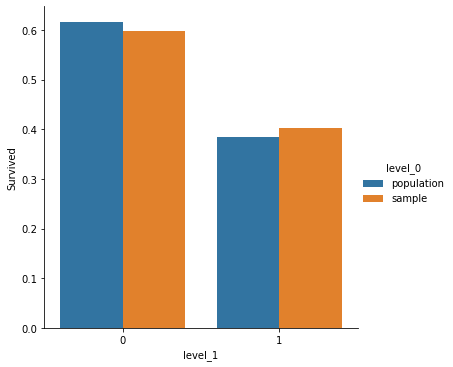

In [47]:
compare_pop_sample(titanic, sr_sample, 'Survived')

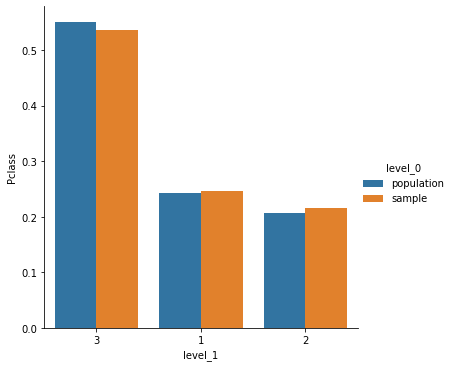

In [49]:
compare_pop_sample(titanic, sr_sample, 'Pclass')

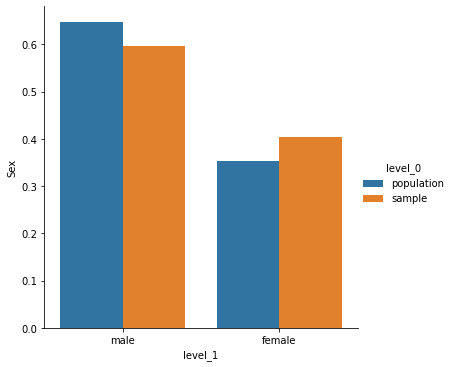

In [50]:
compare_pop_sample(titanic, sr_sample, 'Sex')

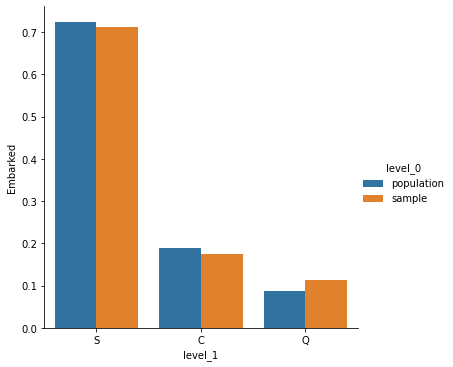

In [51]:
compare_pop_sample(titanic, sr_sample, 'Embarked')

### Stratified Sampling

Sampling approach aimed at minimizing representation bias. It involves grouping members of the population by sub-populations and drawing samples from each one to preserve the ratio/proportion from each group. For each sub-population $k$, draw a fixed percentage of $N_k$ members for the sample.

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    1. Samples can easily be drawn from each sub-population
    <p>
    2. Representation bias is miniminal as stratification takes into acocunt the ratio of sub-populations
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    1. Requires a well-defined sampling frame
    <p>
    2. If the variance within each sub-population is significantly different, stratified sampling may result in the sample variance being skewed
    <p>
    3. If data collection involves travel to various geographical locations, stratification may incur greator cost as each sub-population needs to be accounted for
</div>

In [59]:
st_sample = titanic.groupby('Survived').apply(lambda x: x.sample(frac=.33))
st_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,294,294,294,294,294,294,67,294
unique,294,2,3,294,2,263,62,3
top,683,0,3,"Leyson, Mr. Robert William Norman",male,347088,B96 B98,S
freq,1,181,159,1,196,4,3,224


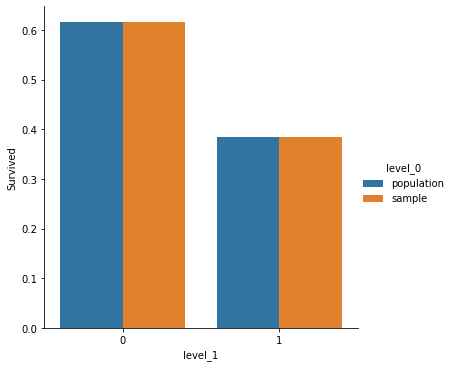

In [60]:
compare_pop_sample(titanic, st_sample, 'Survived')

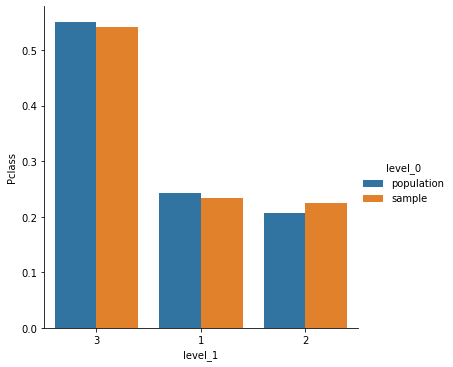

In [61]:
compare_pop_sample(titanic, st_sample, 'Pclass')

In [62]:
st_sample = titanic.groupby('Pclass').apply(lambda x: x.sample(frac=.33))
st_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,294,294,294,294,294,294,67,293
unique,294,2,3,294,2,263,62,3
top,160,0,3,"Leyson, Mr. Robert William Norman",male,347088,D,S
freq,1,175,162,1,189,4,2,215


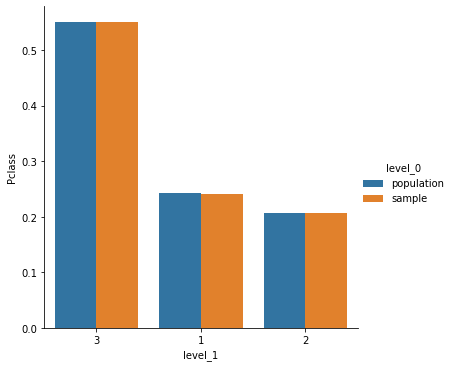

In [63]:
compare_pop_sample(titanic, st_sample, 'Pclass')

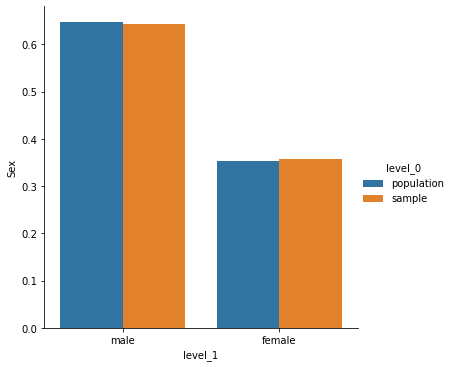

In [64]:
compare_pop_sample(titanic, st_sample, 'Sex')

### Cluster Sampling

Similar to stratified sampling - done over sub-populations. Instead of randomly sampling within each sub-population, randomly select a chosen number of sub-populations and then proceed to sample from the selected sub-populations.

One-stage cluster sampling: **all** elements in a chosen cluster are sampled

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    1. Clusters can easily be selected
    <p>
    2. Works well for large populations
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    1. Requires more than 2 sub-populations to be effective
    <p>
    2. Less control over sample size, poses a problem for populations where the number of members in each sub-population is not equal
</div>

In [70]:
clusters = np.random.choice(titanic['Ticket'].unique(), size=240, replace=False)
clusters_mask = [i in clusters for i in titanic['Ticket']]

cl_sample = titanic.loc[clusters_mask, :]
cl_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,313,313,313,313,313,313,83,313
unique,313,2,3,313,2,240,65,3
top,434,0,3,"Boulos, Mrs. Joseph (Sultana)",male,3101295,C23 C25 C27,S
freq,1,191,165,1,203,6,4,217


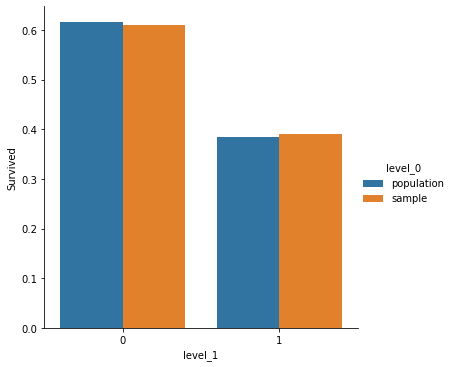

In [71]:
compare_pop_sample(titanic, cl_sample, 'Survived')

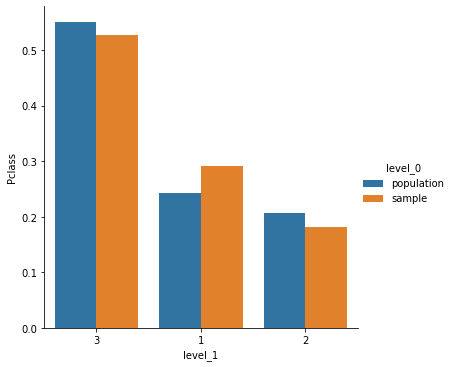

In [72]:
compare_pop_sample(titanic, cl_sample, 'Pclass')

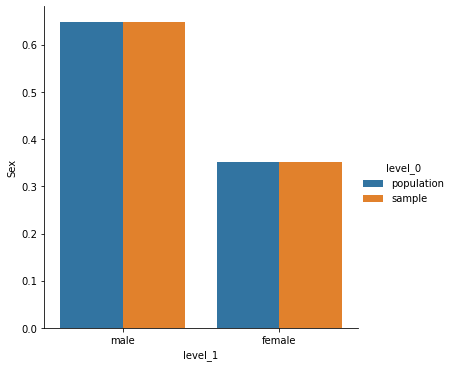

In [74]:
compare_pop_sample(titanic, cl_sample, 'Sex')

### Systematic Sampling

Randomly select an initial member of the population from the sampling frame and selecting additional members following a pre-determined sequence in the form of the index number for a member incremented/decremented by a fixed step size $h$.

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    1. Only requires one instance of random selection, the remaining members are selected using a pre-determined sequence
    <p>
    2. Easy to carry out, even with a loosely-defined sampling frame
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    1. May introduce bias if sampling frame is already arranged
    <p>
    2. If sub-population exist, the resulting sample may not be representative
</div>

In [78]:
start = np.random.choice(len(titanic), 1)
h, n = 7, 300
index = start + h * (np.arange(n))

sy_sample = titanic.iloc[index % len(titanic), :]
sy_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,300,300,300,300,300,300,67,300
unique,300,2,3,300,2,267,60,3
top,434,0,3,"Berglund, Mr. Karl Ivar Sven",male,1601,C23 C25 C27,S
freq,1,186,169,1,205,4,3,216


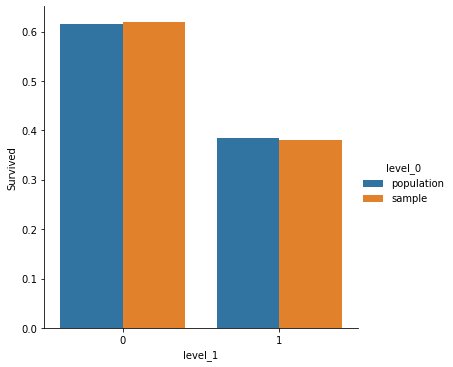

In [79]:
compare_pop_sample(titanic, sy_sample, 'Survived')

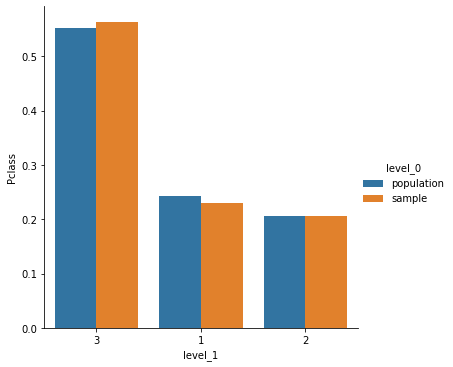

In [80]:
compare_pop_sample(titanic, sy_sample, 'Pclass')

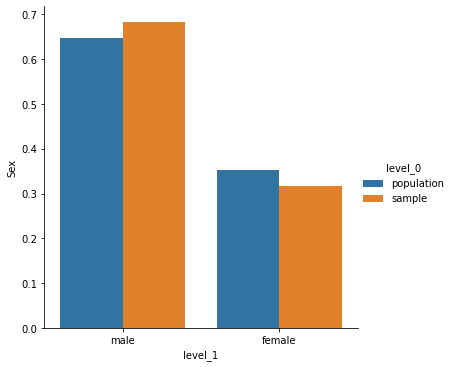

In [81]:
compare_pop_sample(titanic, sy_sample, 'Sex')

### Multistage Sampling

Combine two or more of the above sampling methodologies in series in order to retain the strengths of each technique by leveraging the order in which these techniques are combined.

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    1. A well-selected combination of sampling techniques may yield a significantly better sample than the use of only one sampling technique
    <p>
    2. Combinations such as cluster and stratified sampling result in well-represented samples that are cost-effective to collect
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    1. Poor selection of sampling techniques to combine compound bias
    <p>
    2. Each additional stage introduces added complexity to the overall sampling process
</div>

In [89]:
# Stage 1: simple random sample of clusters
clusters = np.random.choice(titanic['Embarked'], size=2)
ms_sample = titanic[[i in clusters for i in titanic['Embarked']]]
f = 300 / ms_sample.shape[0]

# Stage 2: stratified sampling
ms_sample = ms_sample.groupby('Pclass').apply(lambda x: x.sample(frac=f))
ms_sample = ms_sample.reset_index(drop=True)

ms_sample.describe(include='object')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,300,300,300,300,300,300,57,300
unique,300,2,3,300,2,264,47,2
top,425,0,3,"Leyson, Mr. Robert William Norman",male,CA 2144,F2,S
freq,1,201,177,1,204,4,2,266


In [90]:
pd.crosstab(titanic.loc[:, 'Embarked'],
            titanic.loc[:, 'Pclass'],
            normalize='index').round(2)

Pclass,1,2,3
Embarked,,,
C,0.51,0.10,0.39
Q,0.03,0.04,0.94
S,0.20,0.25,0.55


In [91]:
pd.crosstab(ms_sample.loc[:, 'Embarked'],
            ms_sample.loc[:, 'Pclass'],
            normalize='index').round(2)

Pclass,1,2,3
Embarked,,,
Q,0.03,0.00,0.97
S,0.20,0.26,0.54


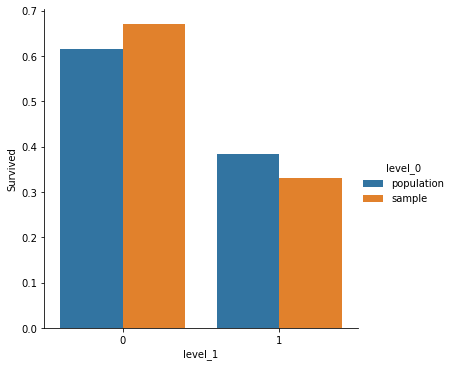

In [92]:
compare_pop_sample(titanic, ms_sample, 'Survived')

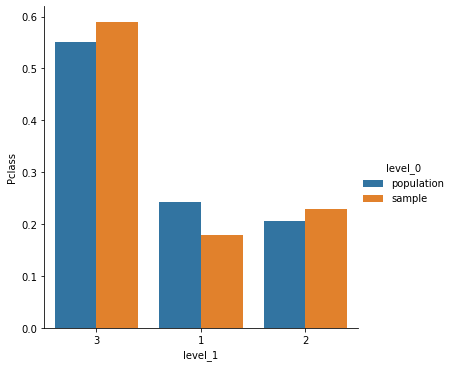

In [93]:
compare_pop_sample(titanic, ms_sample, 'Pclass')

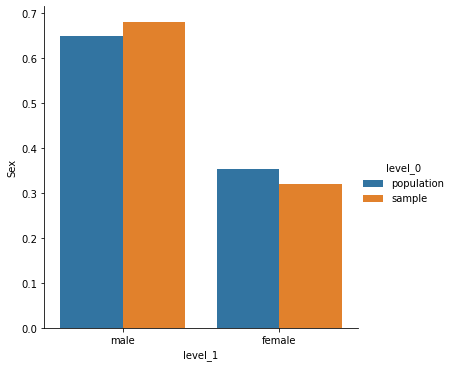

In [95]:
compare_pop_sample(titanic, ms_sample, 'Sex')

## Non-probabilistic Sampling

Sampling technique in which likelihood of a member of a population being selected for a sample is not entirely up to chance. Typically yields significant bias compared to probabilistic methods as it involves sample selections that are based on subjective judgement.

### Convenience Sampling

Selection of members from a population based on ease of access to members of the population.

### Volunteer Sampling

Sampling in which participants are all willing volunteers. This technique yields significant bias because the sample is chosen by the volunteers. Volunteers often have a vested interest in the discussion/topic of study and are keen to share their point of view.

## Effect of Sample Size on Bias

In [96]:
np.random.seed(42)
N = 1000
pop = np.random.choice(100, N, replace=True) + 1
pop_mean = np.mean(pop)
pop_std = np.std(pop, ddof=1)

/Users/binxuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/binxuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


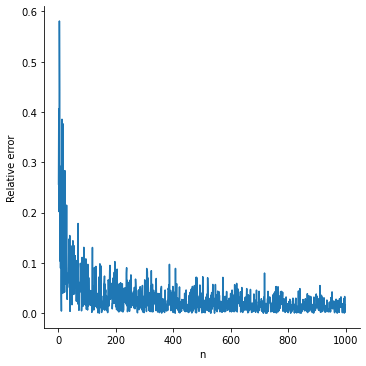

In [100]:
relative_error = [abs(np.mean(np.random.choice(pop, i)) - pop_mean) / pop_mean for i in range(N)]
rerror = pd.DataFrame({'n': np.arange(1000),
                       'Relative error': relative_error})

sns.relplot(x='n', y='Relative error', kind='line', data=rerror);

The relative error decreases as the sample size increases. The larger the sample size used, the better the estimates of the population

### Determining the Minimum Number so Sample

Use power analysis to calculate the optimal sample size. The following pieces of information are required:
- The type of statistical test to run
- Effect size
- Significance level
- Power